# PROYECTO MACHINE LEARNING

### EDA de 4 dataset

In [802]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Origen de dato del dataset
df1 = pd.read_csv("C:/Users/sebac/OneDrive/Documentos/Cursos/0-DATASETS/samsung_stock.csv")
df2 = pd.read_csv("C:/Users/sebac/OneDrive/Documentos/Cursos/0-DATASETS/gym_members_exercise_tracking.csv")
df3 = pd.read_csv("C:/Users/sebac/OneDrive/Documentos/Cursos/0-DATASETS/Customer Purchase Data.csv")
df = pd.read_csv("C:/Users/sebac/OneDrive/Documentos/Cursos/0-DATASETS/Amazon Sale Report.csv")

C:\Users\sebac\AppData\Local\Temp\ipykernel_19420\1179912082.py:10: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/sebac/OneDrive/Documentos/Cursos/0-DATASETS/Amazon Sale Report.csv")


#### SAMSUNG STOCK

In [803]:
# Tamaño y forma del dataframe
df1.shape

(4422, 7)

In [804]:
# Primeras filas del dataframe
df1.head()  # Muestra las primeras 5 filas del dataframe para dar un vistazo inicial a los datos.

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
0,2007-01-02,9109.592773,12520.0,12540.0,12320.0,12400.0,17607300
1,2007-01-03,8934.966797,12280.0,12560.0,12220.0,12540.0,19676500
2,2007-01-04,8818.548828,12120.0,12240.0,12060.0,12220.0,18258900
3,2007-01-05,8658.477539,11900.0,12180.0,11900.0,12160.0,28400400
4,2007-01-08,8498.408203,11680.0,11880.0,11580.0,11840.0,33081550


In [805]:
# Ultimas filas del dataframe
df1.tail()  # Muestra las últimas 5 filas, útil para ver si los datos tienen algún patrón final.

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
4417,2024-11-13,50600.0,50600.0,53000.0,50500.0,52000.0,52527995
4418,2024-11-14,49900.0,49900.0,51800.0,49900.0,50200.0,48510715
4419,2024-11-15,53500.0,53500.0,54200.0,50300.0,50300.0,46774485
4420,2024-11-18,56700.0,56700.0,57500.0,55900.0,57000.0,48095234
4421,2024-11-19,56300.0,56300.0,57500.0,55900.0,56500.0,31539632


In [806]:
# Información general del dataframe
df1.info()  # Muestra el tipo de datos, el número de valores no nulos y el uso de memoria de cada columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4422 entries, 0 to 4421
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4422 non-null   object 
 1   Adj Close   4422 non-null   float64
 2   Close       4422 non-null   float64
 3   High        4422 non-null   float64
 4   Low         4422 non-null   float64
 5   Open        4422 non-null   float64
 6   Volume      4422 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.0+ KB


In [807]:
# Estadísticas descriptivas de las columnas numéricas
df1.describe()  # Calcula estadísticas básicas como media, desviación estándar, mínimo, máximo, y percentiles para las columnas numéricas.

,Adj Close,Close,High,Low,Open,Volume
count,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4.422000e+03
mean,32918.413172,37683.941655,38059.366802,37328.462234,37702.883311,1.701011e+07
std,22321.501792,22208.089444,22409.143471,22044.134346,22237.043447,9.322812e+06
min,5936.673828,8040.000000,8630.000000,8040.000000,8150.000000,0.000000e+00
25%,13595.468506,17820.000000,17980.000000,17640.000000,17825.000000,1.069678e+07
50%,22669.357422,29080.000000,29400.000000,28770.000000,29100.000000,1.455310e+07
75%,49305.708008,55400.000000,56000.000000,55000.000000,55500.000000,2.089984e+07
max,87310.109375,91000.000000,96800.000000,89500.000000,90300.000000,9.030618e+07


In [808]:
# Estadísticas descriptivas de columnas categóricas
df1.describe(include=['object'])  # Muestra estadísticas descriptivas (conteo, valores únicos, categoría más frecuente) para variables categóricas.

,Unnamed: 0
count,4422
unique,4422
top,2024-11-19
freq,1


In [809]:
df1 = df1.rename(columns={'Unnamed: 0': 'fecha'})
df1['fecha'] = pd.to_datetime(df1['fecha'])
df1

,fecha,Adj Close,Close,High,Low,Open,Volume
0,2007-01-02,9109.592773,12520.0,12540.0,12320.0,12400.0,17607300
1,2007-01-03,8934.966797,12280.0,12560.0,12220.0,12540.0,19676500
2,2007-01-04,8818.548828,12120.0,12240.0,12060.0,12220.0,18258900
3,2007-01-05,8658.477539,11900.0,12180.0,11900.0,12160.0,28400400
4,2007-01-08,8498.408203,11680.0,11880.0,11580.0,11840.0,33081550
...,...,...,...,...,...,...,...
4417,2024-11-13,50600.000000,50600.0,53000.0,50500.0,52000.0,52527995
4418,2024-11-14,49900.000000,49900.0,51800.0,49900.0,50200.0,48510715
4419,2024-11-15,53500.000000,53500.0,54200.0,50300.0,50300.0,46774485
4420,2024-11-18,56700.000000,56700.0,57500.0,55900.0,57000.0,48095234


In [810]:
# Comprobación de valores nulos
df1.isnull().sum()  # Cuenta la cantidad de valores nulos en cada columna.

fecha        0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [811]:
# Inspección de nombres de columnas
df1.columns  # Lista los nombres de las columnas, útil para verificar si hay espacios, caracteres especiales o errores tipográficos.

Index(['fecha', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [812]:
# Identificación de valores duplicados
df1.duplicated().sum()  # Muestra la cantidad de filas duplicadas en el dataframe.

np.int64(0)

In [813]:
# Distribución de tipos de datos
df1.dtypes.value_counts()  # Muestra la cantidad de columnas de cada tipo de dato (int, float, object, etc.).

float64           5
datetime64[ns]    1
int64             1
Name: count, dtype: int64

In [814]:
# Distribución de valores en columnas categóricas
for column in df1.select_dtypes(include='object').columns:
    print(df1[column].value_counts())  # Muestra la frecuencia de cada categoría en las columnas categóricas.

C:\Users\sebac\AppData\Local\Temp\ipykernel_19420\2181446123.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df1.resample('M').mean().plot()  # Muestra la tendencia mensual en variables numéricas


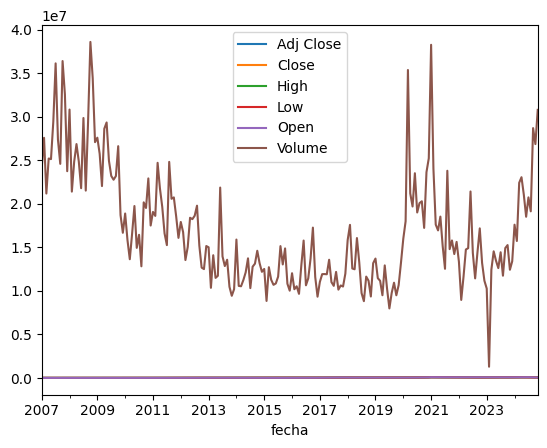

In [815]:
# Análisis de tendencia temporal (para columnas de fecha/hora)
if 'fecha' in df1.columns:  # Reemplaza 'fecha' con el nombre de la columna de fecha si aplica
    df1['fecha'] = pd.to_datetime(df1['fecha'])  # Convierte a tipo datetime si aún no lo está
    df1.set_index('fecha', inplace=True)  # Establece la columna de fecha como índice
    df1.resample('M').mean().plot()  # Muestra la tendencia mensual en variables numéricas

array([[<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

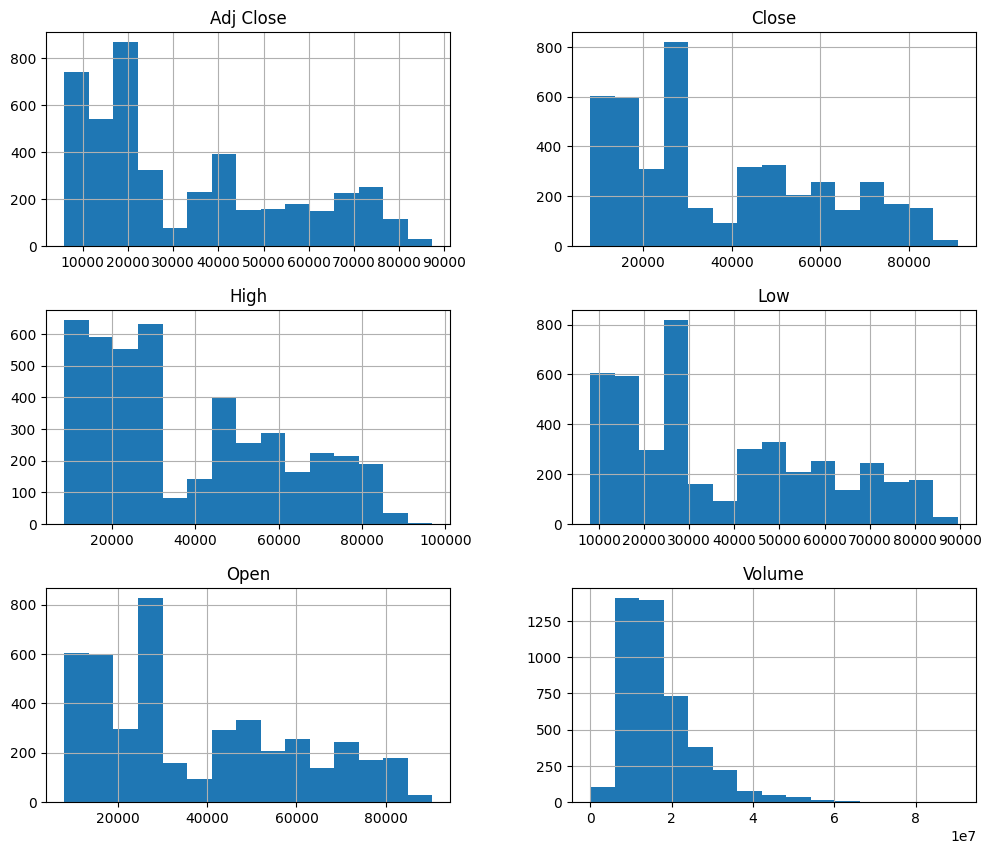

In [816]:
# Visualización de distribuciones numéricas
df1.hist(figsize=(12, 10), bins=15)  # Crea histogramas para todas las columnas numéricas.

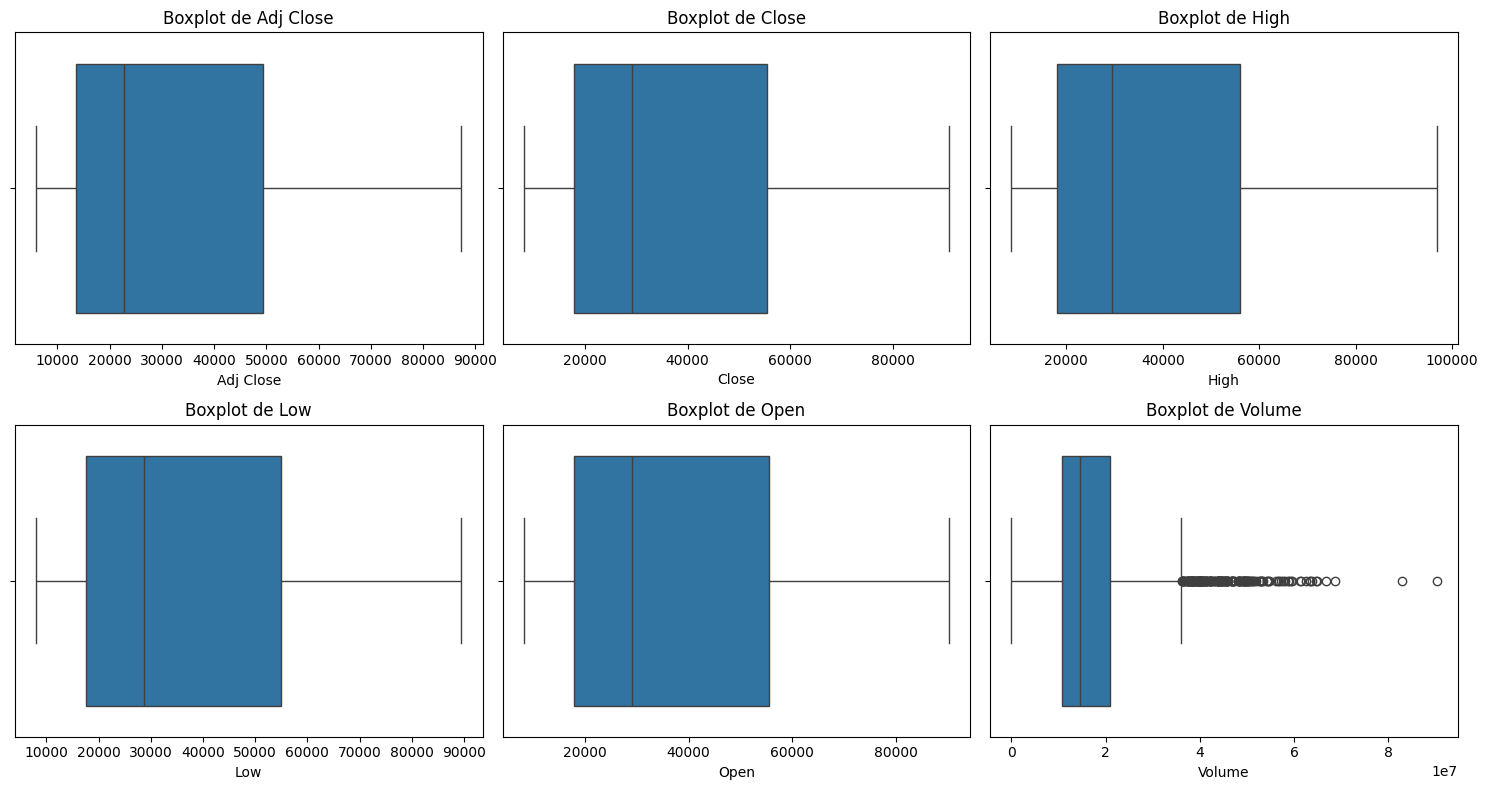

In [817]:
# Boxplots para detectar outliers en columnas numéricas

# Selecciona las columnas numéricas
numeric_columns = df1.select_dtypes(include=['int64', 'float64']).columns

# Define el tamaño de la figura y el layout de los subplots
n_cols = 3  # Número de columnas de subplots en cada fila
n_rows = int(np.ceil(len(numeric_columns) / n_cols))  # Calcula el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Ajusta el tamaño de la figura

# Genera un boxplot en cada subplot
for i, column in enumerate(numeric_columns):
    row = i // n_cols  # Fila del subplot
    col = i % n_cols   # Columna del subplot
    sns.boxplot(data=df1, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot de {column}")

# Oculta cualquier subplot vacío si hay menos columnas que el número de subplots disponibles
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

<Axes: >

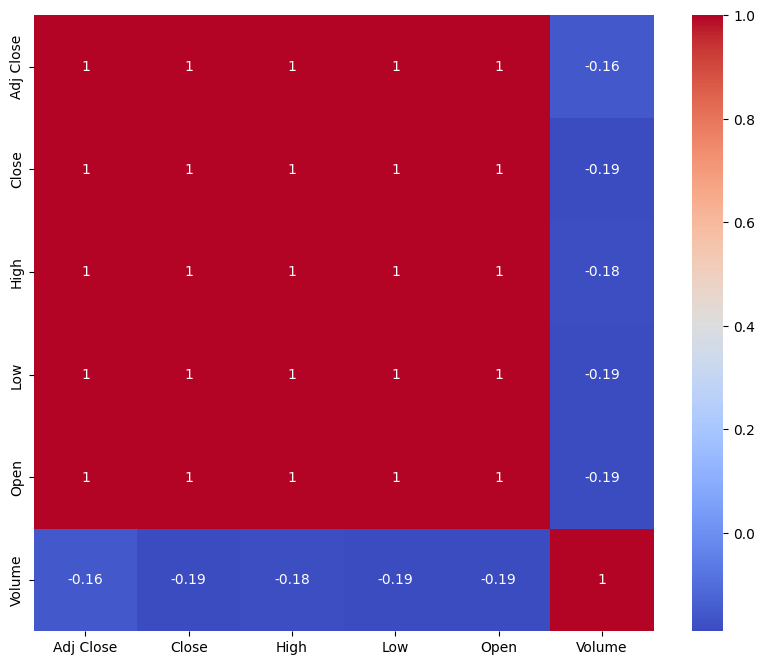

In [818]:
# Seleccionar solo las columnas numéricas para el análisis de correlación
numeric_cols = df1.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = numeric_cols.corr()

# Gráfico de matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")  # Visualiza la matriz de correlación en un heatmap.


#### GYM MEMBERS

In [819]:
# Tamaño y forma del dataframe
df2.shape  # Muestra la cantidad de filas y columnas en el dataframe.


(973, 15)

In [820]:
# Primeras filas del dataframe
df2.head()  # Muestra las primeras 5 filas del dataframe para dar un vistazo inicial a los datos.


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [821]:
# Ultimas filas del dataframe
df2.tail()  # Muestra las últimas 5 filas, útil para ver si los datos tienen algún patrón final.

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74
972,46,Male,88.7,1.63,166,146,66,0.75,542.0,Strength,28.8,3.5,2,1,33.38


In [822]:
# Información general del dataframe
df2.info()  # Muestra el tipo de datos, el número de valores no nulos y el uso de memoria de cada columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [823]:
# Estadísticas descriptivas de las columnas numéricas
df2.describe()  # Calcula estadísticas básicas como media, desviación estándar, mínimo, máximo, y percentiles para las columnas numéricas.


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [824]:
# Comprobación de valores nulos
df2.isnull().sum()  # Cuenta la cantidad de valores nulos en cada columna.

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [825]:
# Inspección de nombres de columnas
df2.columns  # Lista los nombres de las columnas, útil para verificar si hay espacios, caracteres especiales o errores tipográficos.


Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [826]:

# Identificación de valores duplicados
df2.duplicated().sum()  # Muestra la cantidad de filas duplicadas en el dataframe.


np.int64(0)

In [827]:
# Distribución de tipos de datos
df2.dtypes.value_counts()  # Muestra la cantidad de columnas de cada tipo de dato (int, float, object, etc.).


float64    7
int64      6
object     2
Name: count, dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Weight (kg)'}>,
        <Axes: title={'center': 'Height (m)'}>,
        <Axes: title={'center': 'Max_BPM'}>],
       [<Axes: title={'center': 'Avg_BPM'}>,
        <Axes: title={'center': 'Resting_BPM'}>,
        <Axes: title={'center': 'Session_Duration (hours)'}>,
        <Axes: title={'center': 'Calories_Burned'}>],
       [<Axes: title={'center': 'Fat_Percentage'}>,
        <Axes: title={'center': 'Water_Intake (liters)'}>,
        <Axes: title={'center': 'Workout_Frequency (days/week)'}>,
        <Axes: title={'center': 'Experience_Level'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

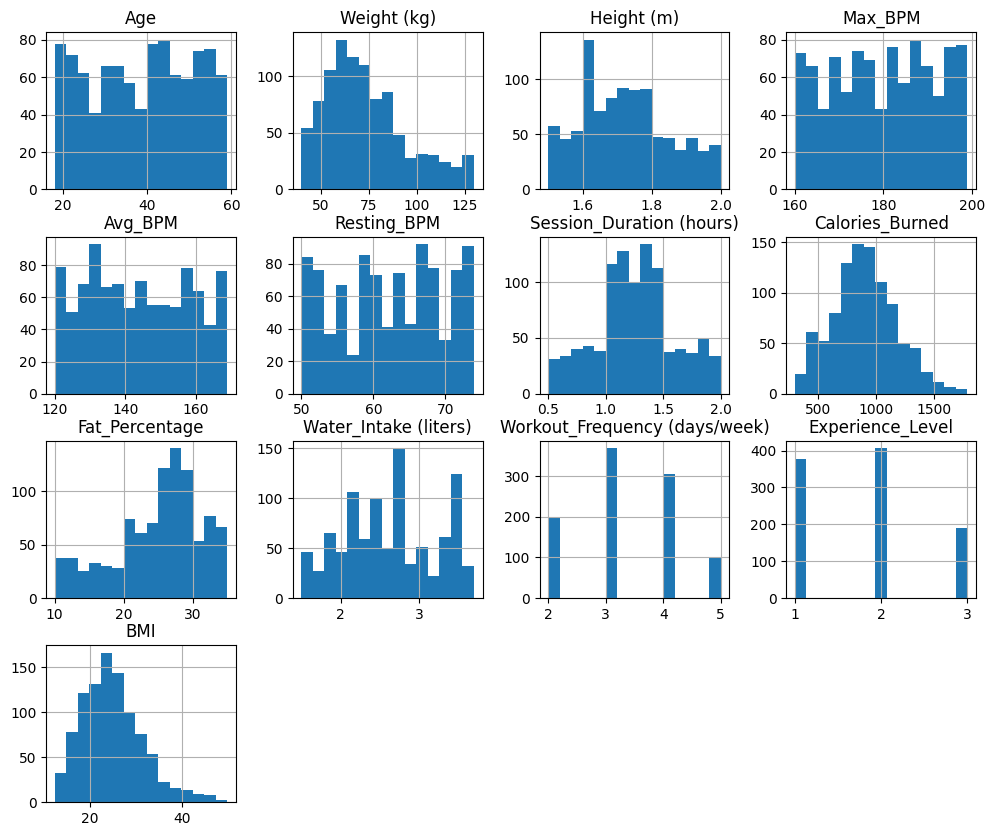

In [828]:
# Visualización de distribuciones numéricas
df2.hist(figsize=(12, 10), bins=15)  # Crea histogramas para todas las columnas numéricas.


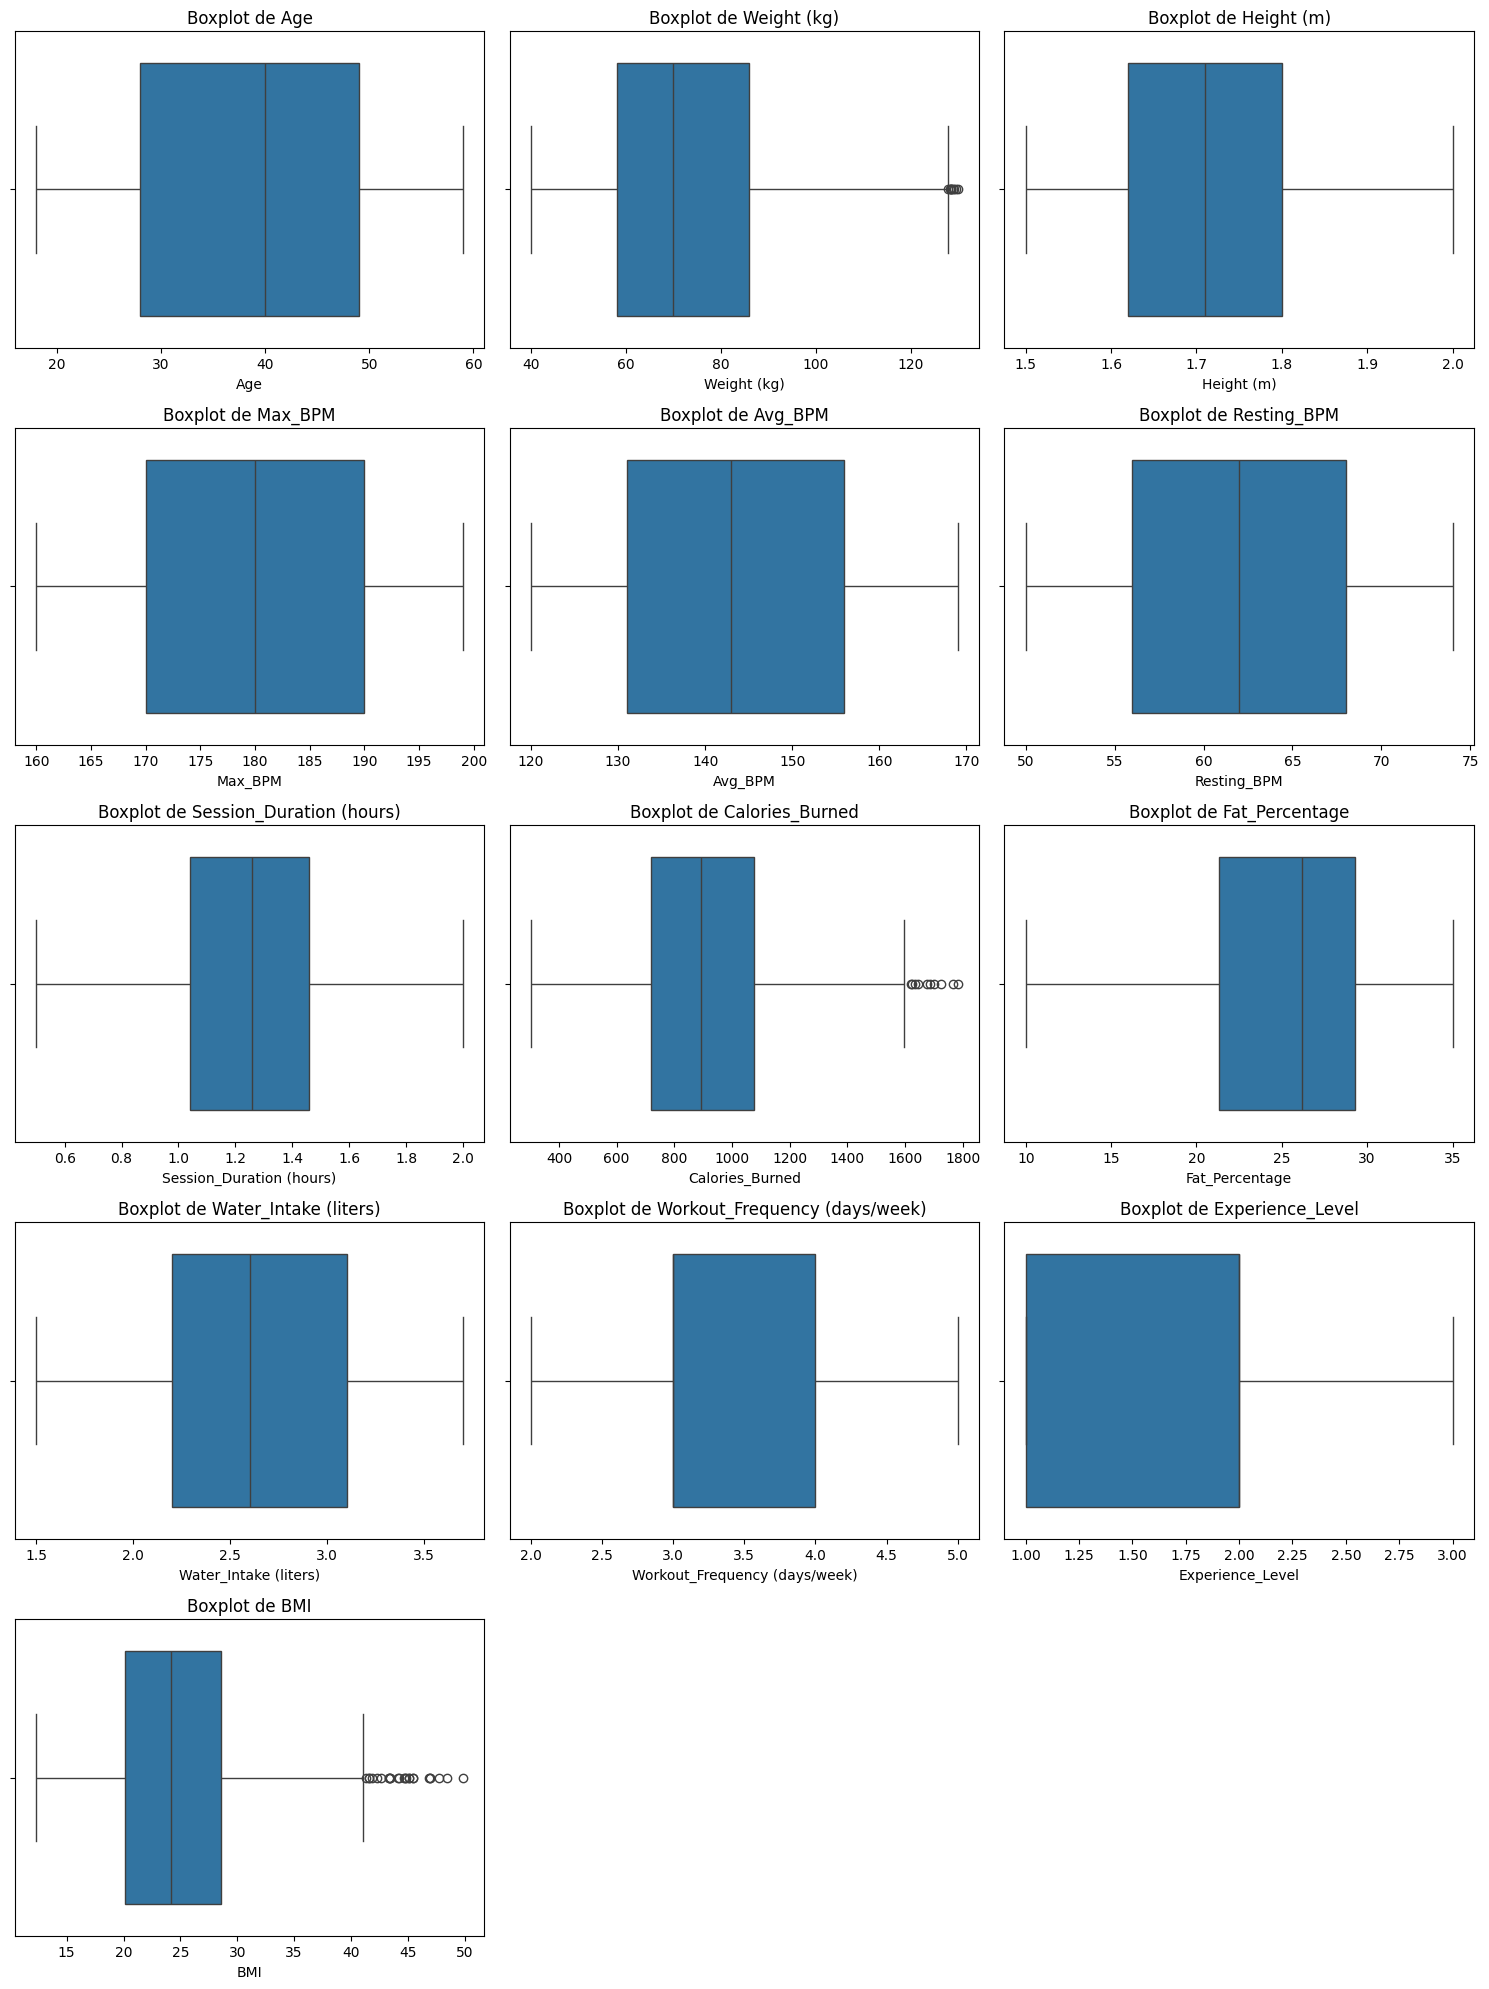

In [829]:
# Boxplots para detectar outliers en columnas numéricas

# Selecciona las columnas numéricas
numeric_columns = df2.select_dtypes(include=['int64', 'float64']).columns

# Define el tamaño de la figura y el layout de los subplots
n_cols = 3  # Número de columnas de subplots en cada fila
n_rows = int(np.ceil(len(numeric_columns) / n_cols))  # Calcula el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Ajusta el tamaño de la figura

# Genera un boxplot en cada subplot
for i, column in enumerate(numeric_columns):
    row = i // n_cols  # Fila del subplot
    col = i % n_cols   # Columna del subplot
    sns.boxplot(data=df2, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot de {column}")

# Oculta cualquier subplot vacío si hay menos columnas que el número de subplots disponibles
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [830]:
# Detectar valores atípicos (outliers) con el rango intercuartil (IQR)
for column in df2.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1

    # Un valor se considera atípico si está por debajo de (Q1 - 1.5 * IQR) o por encima de (Q3 + 1.5 * IQR).
    outliers = df2[(df2[column] < (Q1 - 1.5 * IQR)) | (df2[column] > (Q3 + 1.5 * IQR))]
    print(f"\n{column} - Número de outliers: {outliers.shape[0]}")



Age - Número de outliers: 0

Weight (kg) - Número de outliers: 9

Height (m) - Número de outliers: 0

Max_BPM - Número de outliers: 0

Avg_BPM - Número de outliers: 0

Resting_BPM - Número de outliers: 0

Session_Duration (hours) - Número de outliers: 0

Calories_Burned - Número de outliers: 10

Fat_Percentage - Número de outliers: 0

Water_Intake (liters) - Número de outliers: 0

Workout_Frequency (days/week) - Número de outliers: 0

Experience_Level - Número de outliers: 0

BMI - Número de outliers: 25


<Axes: >

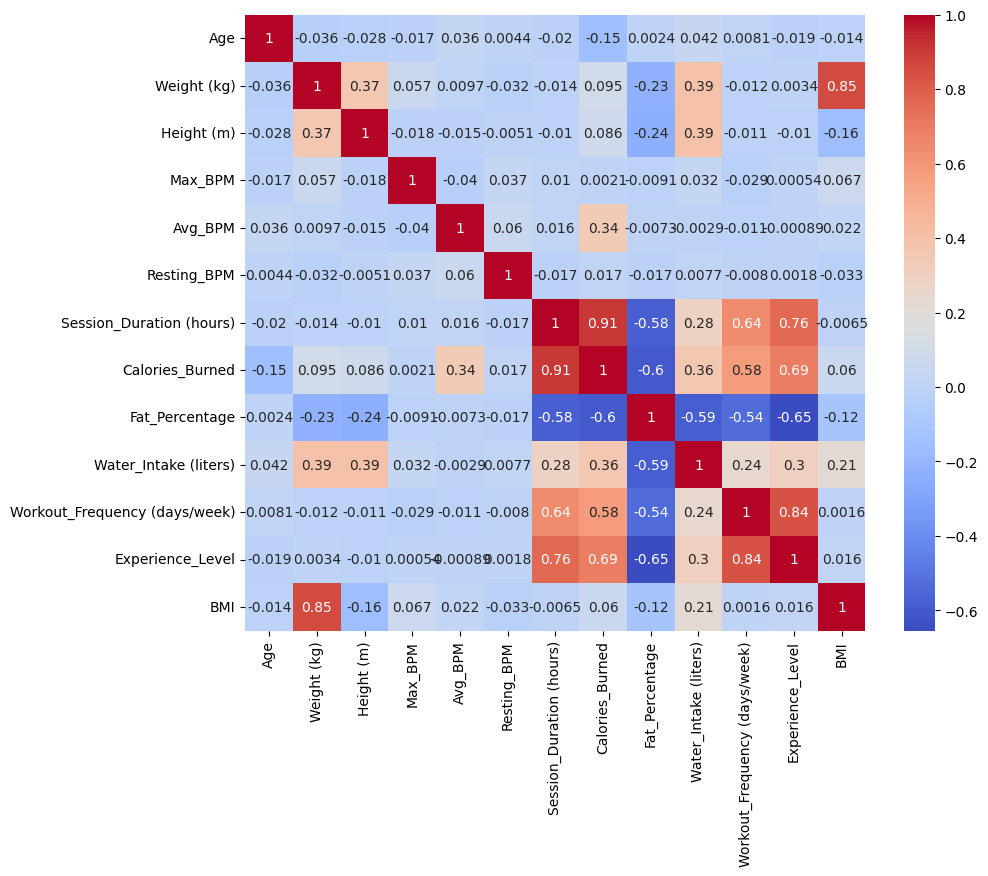

In [831]:
# Seleccionar solo las columnas numéricas para el análisis de correlación
numeric_cols = df2.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = numeric_cols.corr()

# Gráfico de matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")  # Visualiza la matriz de correlación en un heatmap.

#### CUSTOMER PURCHASE DATA

In [832]:
# Tamaño y forma del dataframe
df3.shape  # Muestra la cantidad de filas y columnas en el dataframe.

(1362, 7)

In [833]:
# Primeras filas del dataframe
df3.head()  # Muestra las primeras 5 filas del dataframe para dar un vistazo inicial a los datos.


,Number,Age,Income,Spending_Score,Membership_Years,Purchase_Frequency,Last_Purchase_Amount
0,1,56,61350.84215,12372.864450,15,77.685590,6232.122440
1,2,46,53777.18224,11001.604230,10,51.858351,5545.849698
2,3,32,39460.32263,8007.385018,19,98.166371,4054.645293
3,4,60,66672.12210,13526.548370,12,62.530976,6815.544393
4,5,38,44459.08553,9059.304083,9,46.470533,4617.833484


In [834]:
# Ultimas filas del dataframe
df3.tail()  # Muestra las últimas 5 filas, útil para ver si los datos tienen algún patrón final.


,Number,Age,Income,Spending_Score,Membership_Years,Purchase_Frequency,Last_Purchase_Amount
1357,1358,43,48288.18610,9803.857728,5,26.555193,4949.594221
1358,1359,40,44201.69641,8861.838118,15,77.139029,4472.640516
1359,1360,61,66599.70190,13435.733050,18,91.954877,6757.014812
1360,1361,56,61972.25538,12517.473100,11,56.074110,6306.849735
1361,1362,32,39495.79192,7995.516025,12,61.886333,4034.321683


In [835]:
# Información general del dataframe
df3.info()  # Muestra el tipo de datos, el número de valores no nulos y el uso de memoria de cada columna.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number                1362 non-null   int64  
 1   Age                   1362 non-null   int64  
 2   Income                1362 non-null   float64
 3   Spending_Score        1362 non-null   float64
 4   Membership_Years      1362 non-null   int64  
 5   Purchase_Frequency    1362 non-null   float64
 6   Last_Purchase_Amount  1362 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 74.6 KB


In [836]:
# Estadísticas descriptivas de las columnas numéricas
df3.describe()  # Calcula estadísticas básicas como media, desviación estándar, mínimo, máximo, y percentiles para las columnas numéricas.


,Number,Age,Income,Spending_Score,Membership_Years,Purchase_Frequency,Last_Purchase_Amount
count,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,681.500000,43.251836,48317.193784,9765.372547,9.513950,49.551706,4931.689546
std,393.319844,12.533236,12648.638324,2531.133100,5.417624,27.074169,1266.894447
min,1.000000,18.000000,19946.675740,4064.177336,1.000000,4.876052,2057.551913
25%,341.250000,33.000000,38532.229703,7830.921337,5.000000,26.560455,3962.190531
50%,681.500000,43.000000,48758.233625,9850.200389,9.000000,47.729713,4972.893731
75%,1021.750000,54.000000,58579.901010,11810.345793,14.000000,72.135292,5962.991091
max,1362.000000,64.000000,73182.569800,14791.611800,19.000000,99.492184,7519.376995


In [837]:
# Comprobación de valores nulos
df3.isnull().sum()  # Cuenta la cantidad de valores nulos en cada columna.


Number                  0
Age                     0
Income                  0
Spending_Score          0
Membership_Years        0
Purchase_Frequency      0
Last_Purchase_Amount    0
dtype: int64

In [838]:
# Inspección de nombres de columnas
df3.columns  # Lista los nombres de las columnas, útil para verificar si hay espacios, caracteres especiales o errores tipográficos.


Index(['Number', 'Age', 'Income', 'Spending_Score', 'Membership_Years',
       'Purchase_Frequency', 'Last_Purchase_Amount'],
      dtype='object')

In [839]:
# Identificación de valores duplicados
df3.duplicated().sum()  # Muestra la cantidad de filas duplicadas en el dataframe.


np.int64(0)

In [840]:
# Distribución de tipos de datos
df3.dtypes.value_counts()  # Muestra la cantidad de columnas de cada tipo de dato (int, float, object, etc.).


float64    4
int64      3
Name: count, dtype: int64

array([[<Axes: title={'center': 'Number'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Spending_Score'}>,
        <Axes: title={'center': 'Membership_Years'}>,
        <Axes: title={'center': 'Purchase_Frequency'}>],
       [<Axes: title={'center': 'Last_Purchase_Amount'}>, <Axes: >,
        <Axes: >]], dtype=object)

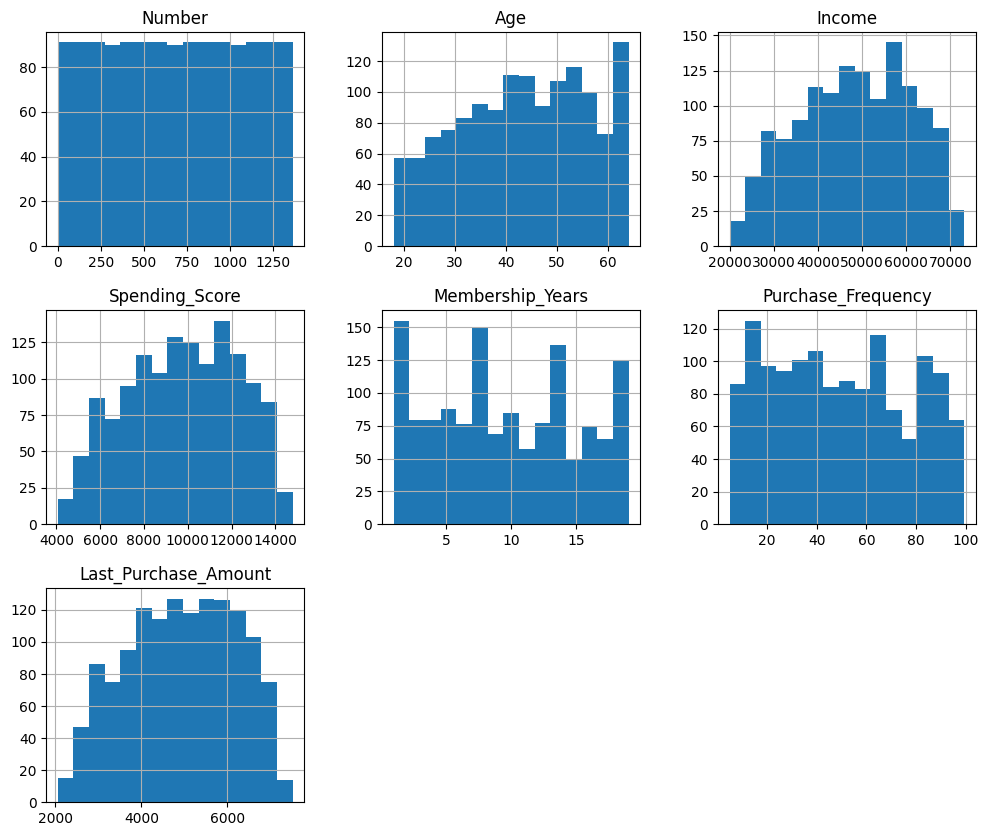

In [841]:
# Visualización de distribuciones numéricas
df3.hist(figsize=(12, 10), bins=15)  # Crea histogramas para todas las columnas numéricas.

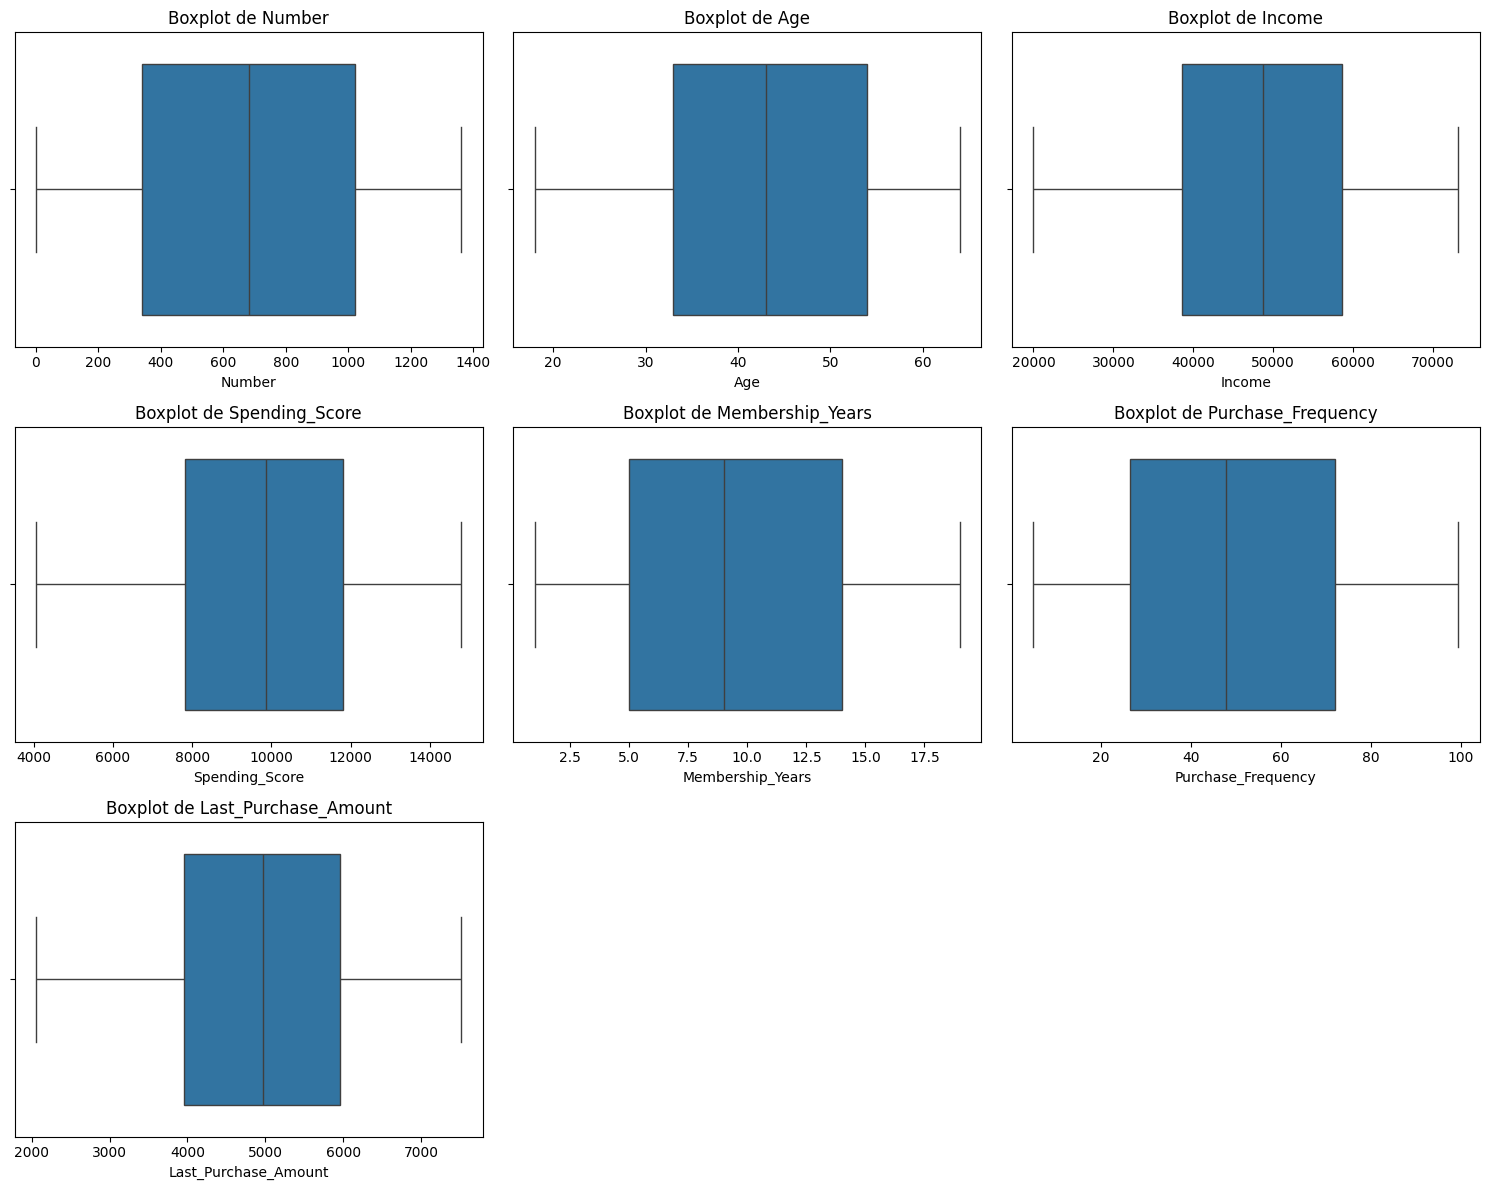

In [842]:
# Boxplots para detectar outliers en columnas numéricas

# Selecciona las columnas numéricas
numeric_columns = df3.select_dtypes(include=['int64', 'float64']).columns

# Define el tamaño de la figura y el layout de los subplots
n_cols = 3  # Número de columnas de subplots en cada fila
n_rows = int(np.ceil(len(numeric_columns) / n_cols))  # Calcula el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Ajusta el tamaño de la figura

# Genera un boxplot en cada subplot
for i, column in enumerate(numeric_columns):
    row = i // n_cols  # Fila del subplot
    col = i % n_cols   # Columna del subplot
    sns.boxplot(data=df3, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot de {column}")

# Oculta cualquier subplot vacío si hay menos columnas que el número de subplots disponibles
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


<Axes: >

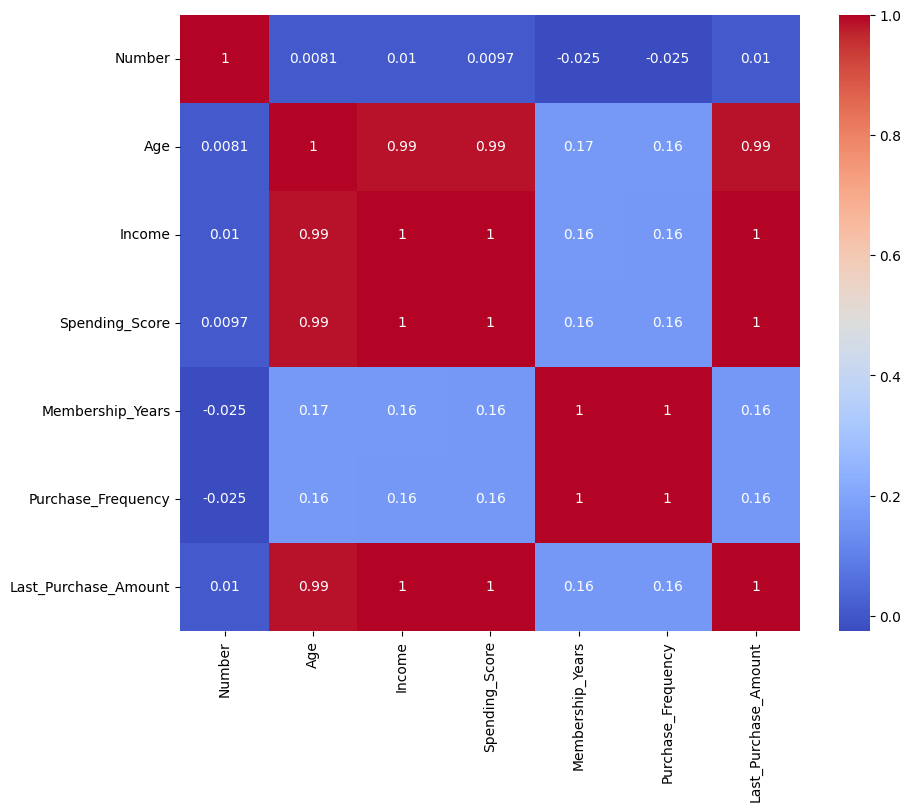

In [843]:
# Seleccionar solo las columnas numéricas para el análisis de correlación
numeric_cols = df3.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = numeric_cols.corr()

# Gráfico de matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")  # Visualiza la matriz de correlación en un heatmap.

#### E-COMMERCE SALES

In [844]:
# Tamaño y forma del dataframe
df.shape  # Muestra la cantidad de filas y columnas en el dataframe.


(128975, 24)

In [845]:
# Primeras filas del dataframe
df.head()  # Muestra las primeras 5 filas del dataframe para dar un vistazo inicial a los datos.


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [846]:
# Ultimas filas del dataframe
df.tail()  # Muestra las últimas 5 filas, útil para ver si los datos tienen algún patrón final.

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128974,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [847]:
# Información general del dataframe
df.info()  # Muestra el tipo de datos, el número de valores no nulos y el uso de memoria de cada columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [848]:
# Estadísticas descriptivas de las columnas numéricas
df.describe()  # Calcula estadísticas básicas como media, desviación estándar, mínimo, máximo, y percentiles para las columnas numéricas.

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [849]:
# Estadísticas descriptivas de columnas categóricas
df.describe(include=['object'])  # Muestra estadísticas descriptivas (conteo, valores únicos, categoría más frecuente) para variables categóricas.

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by,Unnamed: 22
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,39277,79925
unique,120378,91,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1,1
top,171-5057375-2831560,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship,False
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,39277,79925


In [850]:
# Comprobación de valores nulos
df.isnull().sum()  # Cuenta la cantidad de valores nulos en cada columna.


index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [851]:
# Inspección de nombres de columnas
df.columns  # Lista los nombres de las columnas, útil para verificar si hay espacios, caracteres especiales o errores tipográficos.


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [852]:
# Identificación de valores duplicados
df.duplicated().sum()  # Muestra la cantidad de filas duplicadas en el dataframe.


np.int64(0)

In [853]:
# Distribución de tipos de datos
df.dtypes.value_counts()  # Muestra la cantidad de columnas de cada tipo de dato (int, float, object, etc.).


object     19
int64       2
float64     2
bool        1
Name: count, dtype: int64

In [854]:
# Distribución de valores en columnas categóricas
for column in df.select_dtypes(include='object').columns:
    print(df[column].value_counts())  # Muestra la frecuencia de cada categoría en las columnas categóricas.


Order ID
171-5057375-2831560    12
403-4984515-8861958    12
404-9932919-6662730    11
403-0173977-3041148    11
408-3317403-1729937    10
                       ..
403-8464685-9792368     1
407-2378184-3732358     1
403-0816822-3188305     1
402-8261465-0622733     1
408-7436540-8728312     1
Name: count, Length: 120378, dtype: int64
Date
05-03-22    2085
05-02-22    2079
05-04-22    2015
04-14-22    1883
04-15-22    1853
            ... 
06-23-22    1090
06-24-22    1028
06-25-22    1026
06-29-22     658
03-31-22     171
Name: count, Length: 91, dtype: int64
Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                            

In [855]:
# Eliminar los registros que tengan datos de venta nula
df = df.dropna(subset=['Amount'])

C:\Users\sebac\AppData\Local\Temp\ipykernel_19420\1029596962.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\sebac\AppData\Local\Temp\ipykernel_19420\1029596962.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[num_column].resample('M').mean().plot(title=f"Tendencia mensual de {num_column}")


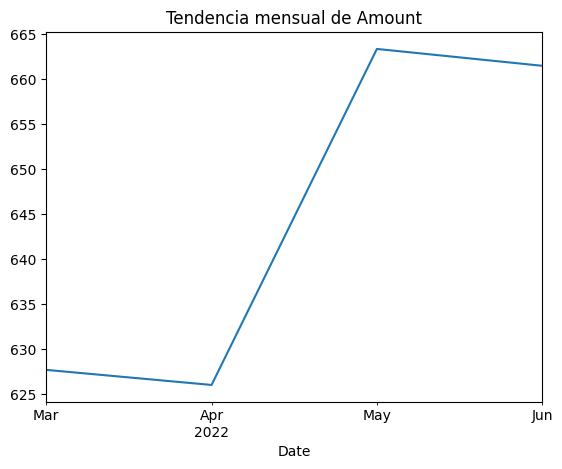

In [856]:
# Nombre de la columna que deseas analizar
num_column = 'Amount'  # Cambia 'Amount' por el nombre de tu columna numérica

if 'Date' in df.columns:  # Verifica si la columna de fecha existe
    # Convertir la columna de fecha a tipo datetime si aún no lo está
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Establecer la columna de fecha como índice
    df.set_index('Date', inplace=True)

    # Verificar si la columna numérica especificada existe y es numérica
    if num_column in df.columns and pd.api.types.is_numeric_dtype(df[num_column]):
        # Resamplear por mes y calcular la media para la columna específica
        df[num_column].resample('M').mean().plot(title=f"Tendencia mensual de {num_column}")
    else:
        print(f"La columna '{num_column}' no existe o no es numérica.")
else:
    print("No se encontró una columna de fecha llamada 'Date'.")

In [857]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121180 entries, 2022-04-30 to 2022-05-31
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               121180 non-null  int64  
 1   Order ID            121180 non-null  object 
 2   Status              121180 non-null  object 
 3   Fulfilment          121180 non-null  object 
 4   Sales Channel       121180 non-null  object 
 5   ship-service-level  121180 non-null  object 
 6   Style               121180 non-null  object 
 7   SKU                 121180 non-null  object 
 8   Category            121180 non-null  object 
 9   Size                121180 non-null  object 
 10  ASIN                121180 non-null  object 
 11  Courier Status      116044 non-null  object 
 12  Qty                 121180 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city         

array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'Qty'}>],
       [<Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'ship-postal-code'}>]], dtype=object)

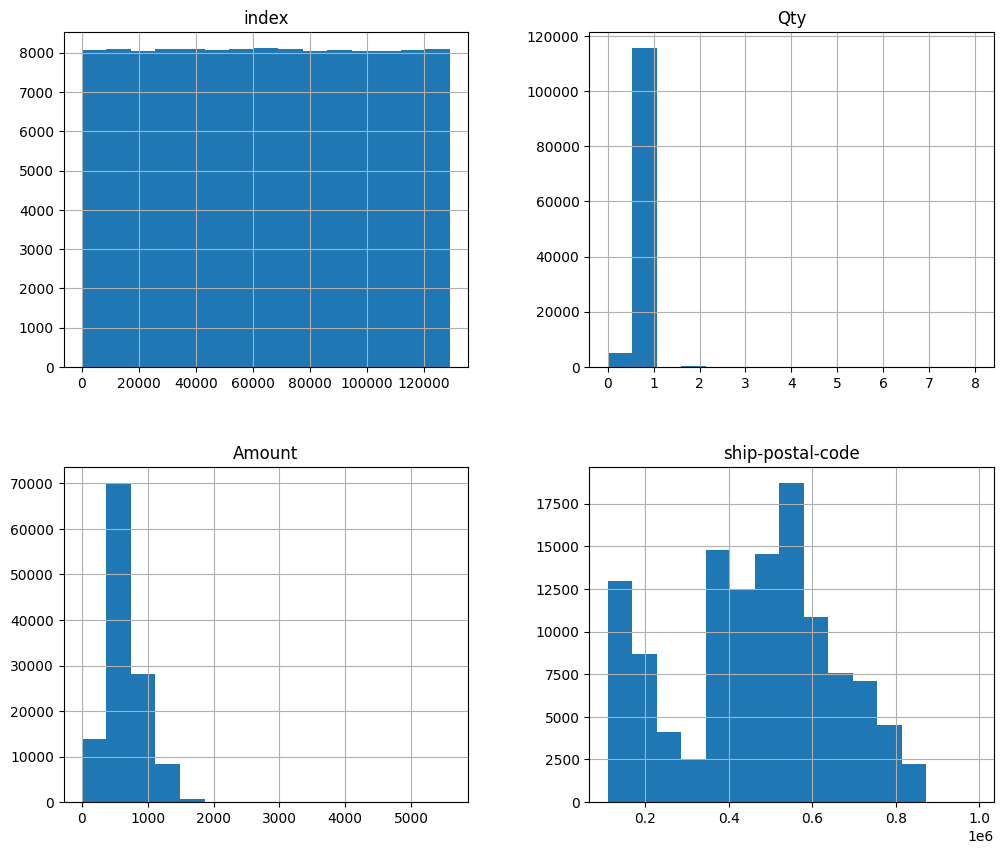

In [858]:
# Visualización de distribuciones numéricas
df.hist(figsize=(12, 10), bins=15)  # Crea histogramas para todas las columnas numéricas.


In [859]:
df = df.query("Status == 'Shipped'")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77596 entries, 2022-04-30 to 2022-05-31
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               77596 non-null  int64  
 1   Order ID            77596 non-null  object 
 2   Status              77596 non-null  object 
 3   Fulfilment          77596 non-null  object 
 4   Sales Channel       77596 non-null  object 
 5   ship-service-level  77596 non-null  object 
 6   Style               77596 non-null  object 
 7   SKU                 77596 non-null  object 
 8   Category            77596 non-null  object 
 9   Size                77596 non-null  object 
 10  ASIN                77596 non-null  object 
 11  Courier Status      77596 non-null  object 
 12  Qty                 77596 non-null  int64  
 13  currency            77596 non-null  object 
 14  Amount              77596 non-null  float64
 15  ship-city           77580 non-null  

In [860]:
df = df.drop(['index', 'Order ID', 'Unnamed: 22', 'fulfilled-by', 'ASIN', 'Courier Status', 'Qty', 'ship-postal-code','Status',
              'Fulfilment','currency','ship-city','ship-state','ship-country','B2B'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77596 entries, 2022-04-30 to 2022-05-31
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sales Channel       77596 non-null  object 
 1   ship-service-level  77596 non-null  object 
 2   Style               77596 non-null  object 
 3   SKU                 77596 non-null  object 
 4   Category            77596 non-null  object 
 5   Size                77596 non-null  object 
 6   Amount              77596 non-null  float64
 7   promotion-ids       46825 non-null  object 
dtypes: float64(1), object(7)
memory usage: 5.3+ MB


In [862]:
df = df.reset_index(drop=True)


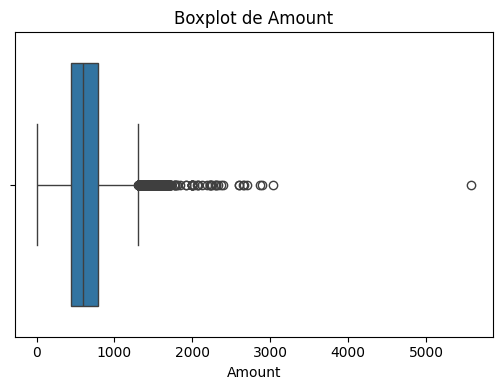

In [863]:
# Boxplots para detectar outliers en columnas numéricas

# Selecciona las columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define el tamaño de la figura y el layout de los subplots
n_cols = 3  # Número de columnas de subplots en cada fila
n_rows = int(np.ceil(len(numeric_columns) / n_cols))  # Calcula el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Ajusta el tamaño de la figura

# Asegurar que `axes` sea iterable, incluso con un solo subplot
if n_rows * n_cols == 1:
    axes = np.array([axes])  # Convierte en arreglo un solo subplot
axes = axes.flatten()  # Aplana el arreglo para facilitar la indexación

# Genera un boxplot en cada subplot
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f"Boxplot de {column}")

# Oculta cualquier subplot vacío si hay menos columnas que el número de subplots disponibles
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [864]:
# Detectar valores atípicos (outliers) con el rango intercuartil (IQR)
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Un valor se considera atípico si está por debajo de (Q1 - 1.5 * IQR) o por encima de (Q3 + 1.5 * IQR).
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    print(f"\n{column} - Número de outliers: {outliers.shape[0]}")



Amount - Número de outliers: 2133


In [865]:
def eliminar_outliers_columna(df, columna):
    # Copiar el dataframe original para mantener el original sin cambios
    df_sin_outliers = df.copy()
    
    # Verificar si la columna está en el dataframe y si es numérica
    if columna in df_sin_outliers.select_dtypes(include=['float64', 'int64']).columns:
        # Calcular el primer y tercer cuartil, y el rango intercuartil (IQR)
        Q1 = df_sin_outliers[columna].quantile(0.25)
        Q3 = df_sin_outliers[columna].quantile(0.75)
        IQR = Q3 - Q1

        # Definir los límites inferior y superior para los outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrar el dataframe excluyendo los outliers para la columna indicada
        df_sin_outliers = df_sin_outliers[(df_sin_outliers[columna] >= lower_bound) & 
                                          (df_sin_outliers[columna] <= upper_bound)]
    else:
        print(f"La columna '{columna}' no existe o no es numérica.")
    
    return df_sin_outliers


# Ejecutar la función para obtener el dataframe sin outliers en una columna específica
columna_objetivo = 'Amount'  # Especifica la columna deseada
df_sin_outliers = eliminar_outliers_columna(df, columna_objetivo)


# Verificar la cantidad de filas antes y después de la limpieza
print(f"Dataframe original: {df.shape}")
print(f"Dataframe sin outliers en '{columna_objetivo}': {df_sin_outliers.shape}")

# Calcular y mostrar la diferencia de filas
diferencia_filas = df.shape[0] - df_sin_outliers.shape[0]
print(f"Diferencia de filas eliminadas: {diferencia_filas}")

# Reemplazar dataset para continuar el analisis
df = df_sin_outliers

Dataframe original: (77596, 8)
Dataframe sin outliers en 'Amount': (75463, 8)
Diferencia de filas eliminadas: 2133


In [866]:
df.isnull().sum()

Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
Amount                    0
promotion-ids         30048
dtype: int64

In [867]:
df = df.dropna(subset='promotion-ids')
df.isnull().sum()

Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
Amount                0
promotion-ids         0
dtype: int64

In [868]:
df.shape

(45415, 8)

In [871]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

### ENTRENAMIENTO DE LOS MODELOS CON EL DATASET SELECCIONADO

In [872]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

X = df2.drop(["Experience_Level"], axis=1) # Features
y = df2["Experience_Level"] # Target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=[int, float]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [873]:
# LOGISTIC REGRESSION

# CON GRID SEARCH

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir los hiperparámetros a buscar para la regresión logística
param_grid_lgr = {
    'model__C': [0.1, 1, 10],  # Regularización (hiperparámetro C)
    'model__solver': ['liblinear', 'saga'],  # Algoritmos de optimización
    'model__max_iter': [100, 200]  # Número máximo de iteraciones
}

# Crear un Pipeline completo para regresión logística
pipeline_lgr = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocesamiento
    ('model', LogisticRegression())  # Modelo de regresión logística
])

# Crear el objeto GridSearchCV para la regresión logística
grid_search_lgr = GridSearchCV(estimator=pipeline_lgr, param_grid=param_grid_lgr, cv=5, n_jobs=-1, verbose=1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search_lgr.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados para la regresión logística
print(f"Mejores parámetros (Logistic Regression): {grid_search_lgr.best_params_}")

# Obtener el mejor modelo para la regresión logística
best_model_lgr = grid_search_lgr.best_estimator_

# Hacer predicciones utilizando el mejor modelo
y_pred_lgr = best_model_lgr.predict(X_test)

# Evaluar el modelo de regresión logística
accuracy_lgr = accuracy_score(y_test, y_pred_lgr)
metrics_lgr = classification_report(y_test, y_pred_lgr)
conf_matrix_lgr = confusion_matrix(y_test, y_pred_lgr)

# Mostrar resultados
print(f'Exactitud (Logistic Regression): {accuracy_lgr}')
print('Informe de Clasificación (Logistic Regression):')
print(metrics_lgr)
print('Matriz de Confusión (Logistic Regression):')
print(conf_matrix_lgr)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores parámetros (Logistic Regression): {'model__C': 0.1, 'model__max_iter': 100, 'model__solver': 'saga'}
Exactitud (Logistic Regression): 0.8871794871794871
Informe de Clasificación (Logistic Regression):
              precision    recall  f1-score   support

           1       0.86      0.86      0.86        78
           2       0.85      0.85      0.85        75
           3       1.00      1.00      1.00        42

    accuracy                           0.89       195
   macro avg       0.90      0.90      0.90       195
weighted avg       0.89      0.89      0.89       195

Matriz de Confusión (Logistic Regression):
[[67 11  0]
 [11 64  0]
 [ 0  0 42]]


In [874]:
# KNN Clasificacion con Grid Search

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir los parámetros a buscar para el modelo KNN (clasificación)
param_grid_knn_c = {
    'knn_c__n_neighbors': list(range(1, 21)),  # Rango de vecinos a probar
    'knn_c__weights': ['uniform', 'distance'],  # Tipo de ponderación
    'knn_c__metric': ['euclidean', 'manhattan']  # Métrica de distancia
}

# Crear un Pipeline para el modelo KNN de clasificación
pipeline_knn_c = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocesador
    ('knn_c', KNeighborsClassifier())  # Clasificador KNN
])

# Crear el objeto GridSearchCV para buscar los mejores hiperparámetros
grid_search_knn_c = GridSearchCV(estimator=pipeline_knn_c, param_grid=param_grid_knn_c, 
                                 cv=5, n_jobs=-1, verbose=1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search_knn_c.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(f"Mejores parámetros (KNN Clasificación): {grid_search_knn_c.best_params_}")

# Obtener el mejor modelo KNN
best_model_knn_c = grid_search_knn_c.best_estimator_

# Hacer predicciones utilizando el mejor modelo
y_pred_knn_c = best_model_knn_c.predict(X_test)

# Evaluar el modelo de KNN clasificación
accuracy_knn_c = accuracy_score(y_test, y_pred_knn_c)
metrics_knn_c = classification_report(y_test, y_pred_knn_c)
conf_matrix_knn_c = confusion_matrix(y_test, y_pred_knn_c)

# Mostrar resultados
print(f'Exactitud (KNN Clasificación): {accuracy_knn_c}')
print('Informe de Clasificación (KNN Clasificación):')
print(metrics_knn_c)
print('Matriz de Confusión (KNN Clasificación):')
print(conf_matrix_knn_c)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Mejores parámetros (KNN Clasificación): {'knn_c__metric': 'euclidean', 'knn_c__n_neighbors': 16, 'knn_c__weights': 'distance'}
Exactitud (KNN Clasificación): 0.8666666666666667
Informe de Clasificación (KNN Clasificación):
              precision    recall  f1-score   support

           1       0.88      0.77      0.82        78
           2       0.79      0.89      0.84        75
           3       1.00      1.00      1.00        42

    accuracy                           0.87       195
   macro avg       0.89      0.89      0.89       195
weighted avg       0.87      0.87      0.87       195

Matriz de Confusión (KNN Clasificación):
[[60 18  0]
 [ 8 67  0]
 [ 0  0 42]]


In [875]:
# DECISION TREE para clasificacion con Grid Search

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir los parámetros a buscar para el modelo de Decision Tree (clasificación)
param_grid_dt_c = {
    'dt_c__criterion': ['gini', 'entropy'],  # Criterios a probar
    'dt_c__max_depth': [None, 5, 10, 15, 20],  # Profundidad máxima del árbol
    'dt_c__min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    'dt_c__min_samples_leaf': [1, 2, 4],  # Mínimo número de muestras en una hoja
    'dt_c__random_state': [42]  # Estado aleatorio para la reproducibilidad
}

# Crear un Pipeline para el modelo de Decision Tree (clasificación)
pipeline_dt_c = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocesador
    ('dt_c', DecisionTreeClassifier(random_state=42))  # Clasificador DecisionTree
])

# Crear el objeto GridSearchCV para la búsqueda de hiperparámetros
grid_search_dt_c = GridSearchCV(estimator=pipeline_dt_c, param_grid=param_grid_dt_c, 
                                cv=5, n_jobs=-1, verbose=1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search_dt_c.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(f"Mejores parámetros (Decision Tree Clasificación): {grid_search_dt_c.best_params_}")

# Obtener el mejor modelo de Decision Tree
best_model_dt_c = grid_search_dt_c.best_estimator_

# Hacer predicciones utilizando el mejor modelo
y_pred_dt_c = best_model_dt_c.predict(X_test)

# Evaluar el modelo de Decision Tree (clasificación)
accuracy_dt_c = accuracy_score(y_test, y_pred_dt_c)
metrics_dt_c = classification_report(y_test, y_pred_dt_c)
conf_matrix_dt_c = confusion_matrix(y_test, y_pred_dt_c)

# Mostrar resultados
print(f'Exactitud (Decision Tree Clasificación): {accuracy_dt_c}')
print('Informe de Clasificación:')
print(metrics_dt_c)
print('Matriz de Confusión:')
print(conf_matrix_dt_c)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Mejores parámetros (Decision Tree Clasificación): {'dt_c__criterion': 'entropy', 'dt_c__max_depth': 5, 'dt_c__min_samples_leaf': 1, 'dt_c__min_samples_split': 2, 'dt_c__random_state': 42}
Exactitud (Decision Tree Clasificación): 0.9230769230769231
Informe de Clasificación:
              precision    recall  f1-score   support

           1       1.00      0.81      0.89        78
           2       0.83      1.00      0.91        75
           3       1.00      1.00      1.00        42

    accuracy                           0.92       195
   macro avg       0.94      0.94      0.93       195
weighted avg       0.94      0.92      0.92       195

Matriz de Confusión:
[[63 15  0]
 [ 0 75  0]
 [ 0  0 42]]


In [876]:
# RANDOM FOREST Con Grid Search

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir los parámetros a buscar para el modelo Random Forest (clasificación)
param_grid_rf_c = {
    'rf_c__n_estimators': [50, 100, 150],  # Número de árboles en el bosque
    'rf_c__criterion': ['gini', 'entropy'],  # Criterio para dividir los nodos
    'rf_c__max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'rf_c__min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    'rf_c__min_samples_leaf': [1, 2, 4],  # Mínimo número de muestras en una hoja
    'rf_c__random_state': [42]  # Estado aleatorio para la reproducibilidad
}

# Crear un Pipeline para el modelo Random Forest (clasificación)
pipeline_rf_c = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocesador
    ('rf_c', RandomForestClassifier(random_state=42))  # Clasificador RandomForest
])

# Crear el objeto GridSearchCV para la búsqueda de hiperparámetros
grid_search_rf_c = GridSearchCV(estimator=pipeline_rf_c, param_grid=param_grid_rf_c, 
                                cv=5, n_jobs=-1, verbose=1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search_rf_c.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(f"Mejores parámetros (Random Forest Clasificación): {grid_search_rf_c.best_params_}")

# Obtener el mejor modelo de Random Forest
best_model_rf_c = grid_search_rf_c.best_estimator_

# Hacer predicciones utilizando el mejor modelo
y_pred_rf_c = best_model_rf_c.predict(X_test)

# Evaluar el modelo de Random Forest (clasificación)
accuracy_rf_c = accuracy_score(y_test, y_pred_rf_c)
metrics_rf_c = classification_report(y_test, y_pred_rf_c)
conf_matrix_rf_c = confusion_matrix(y_test, y_pred_rf_c)

# Mostrar resultados
print(f'Exactitud (Random Forest Clasificación): {accuracy_rf_c}')
print('Informe de Clasificación:')
print(metrics_rf_c)
print('Matriz de Confusión:')
print(conf_matrix_rf_c)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores parámetros (Random Forest Clasificación): {'rf_c__criterion': 'gini', 'rf_c__max_depth': 10, 'rf_c__min_samples_leaf': 1, 'rf_c__min_samples_split': 5, 'rf_c__n_estimators': 150, 'rf_c__random_state': 42}
Exactitud (Random Forest Clasificación): 0.9128205128205128
Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.97      0.81      0.88        78
           2       0.83      0.97      0.90        75
           3       1.00      1.00      1.00        42

    accuracy                           0.91       195
   macro avg       0.93      0.93      0.93       195
weighted avg       0.92      0.91      0.91       195

Matriz de Confusión:
[[63 15  0]
 [ 2 73  0]
 [ 0  0 42]]


In [877]:
# ORGANIZACION DE RESULTADOS

# Crear un DataFrame para almacenar los resultados
results_org = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest'],
    'Precision': [accuracy_lgr, accuracy_knn_c, accuracy_dt_c, accuracy_rf_c],
    'Metricas': [metrics_lgr, metrics_knn_c, metrics_dt_c, metrics_rf_c]
})

# Imprimir los resultados
print(results_org)

               Model  Precision  \
0  Linear Regression   0.887179   
1                KNN   0.866667   
2      Decision Tree   0.923077   
3      Random Forest   0.912821   

                                            Metricas  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  
2                precision    recall  f1-score   ...  
3                precision    recall  f1-score   ...  


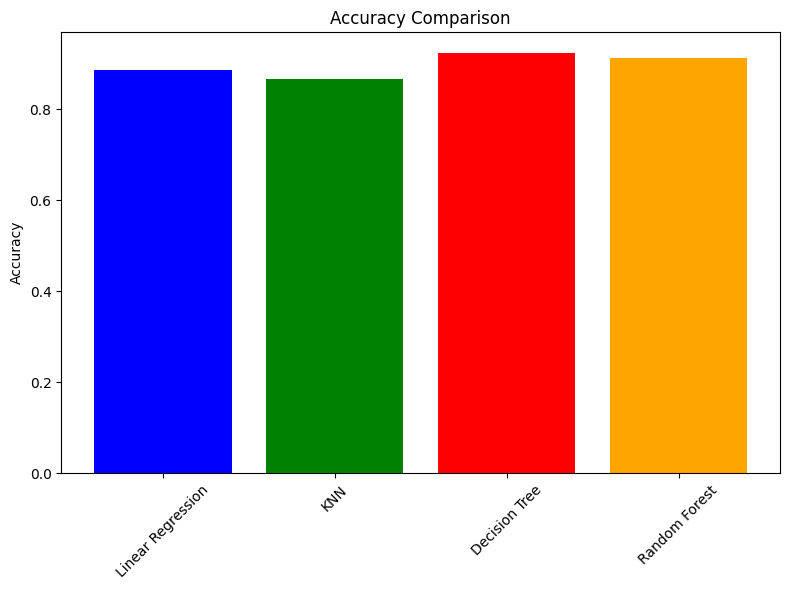

In [879]:
# GRAFICAR LOS RESULTADOS

import matplotlib.pyplot as plt

# Definir colores para cada modelo
colors = ['blue', 'green', 'red', 'orange']

# Crear figura
plt.figure(figsize=(8, 6))

# Gráfico de Precision
plt.bar(results_org['Model'], results_org['Precision'], color=colors)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(range(len(results_org['Model'])), results_org['Model'], rotation=45)  # Rotar etiquetas

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [880]:
# COMPARAR TIEMPO DE ENTRENAMIENTO

import time

# Función para medir el tiempo de entrenamiento
def measure_training_time(pipeline, X_train, y_train):
    start_time = time.perf_counter()
    pipeline.fit(X_train, y_train)
    end_time = time.perf_counter()
    return end_time - start_time

# Medir el tiempo de entrenamiento para cada modelo
time_lgr = measure_training_time(pipeline_lgr, X_train, y_train)
time_knn_c = measure_training_time(pipeline_knn_c, X_train, y_train)
time_dt = measure_training_time(pipeline_dt_c, X_train, y_train)
time_rf = measure_training_time(pipeline_rf_c, X_train, y_train)

# Agregar el tiempo al DataFrame
results_org['Training Time (s)'] = [time_lgr, time_knn_c, time_dt, time_rf]

# Imprimir los resultados con tiempo de entrenamiento
print(results_org)

               Model  Precision  \
0  Linear Regression   0.887179   
1                KNN   0.866667   
2      Decision Tree   0.923077   
3      Random Forest   0.912821   

                                            Metricas  Training Time (s)  
0                precision    recall  f1-score   ...           0.024009  
1                precision    recall  f1-score   ...           0.010346  
2                precision    recall  f1-score   ...           0.013029  
3                precision    recall  f1-score   ...           0.162647  


In [881]:
# LAZY PREDICT
from lazypredict.Supervised import LazyClassifier

# Crear el objeto LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Entrenar y evaluar los modelos
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Mostrar los resultados
print(models)

100%|██████████| 31/31 [00:00<00:00, 32.78it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1308
[LightGBM] [Info] Number of data points in the train set: 778, number of used features: 18
[LightGBM] [Info] Start training from score -0.959633
[LightGBM] [Info] Start training from score -0.854608
[LightGBM] [Info] Start training from score -1.652780
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split